In [30]:
# -*- coding: utf-8 -*-
"""
Editor: Mathias Godwin
Mail: godwinsaint6@gmail.com
"""
import random
import time 
import pandas as pd
c = []
def choicer():
    a = ['+', '-', '*', '/']
    b = random.choice(a)
    c.append(b)
    return b, c

def generate(ranges, level):
    left = [random.randint(-level, level) for i in range(ranges)]
    right = [random.randint(-level, level) for i in range(ranges)]
    return right, left

def choose(val=c):
    return val

def refine(mid):
    for i, j in mid:
       b, c = choicer()
       choose(c)
       if b == '+':
           return i+j
       elif b == '-':
           return i-j
       elif b == '*':
           return i * j
       if (b == '/' and j == 0):
           return 0
       else:
           return i / j

def calculate(ranges, level):
    right, left = generate(ranges=ranges, level=level)
    middle = zip(right, left)
    get_val = [refine(middle) for i in range(ranges)]
    return pd.DataFrame({'left':right, 'right':left, 'operator':choose(), 'answer':get_val}), right, left


def play(ranges=10, level=10):
    _, right, left = calculate(ranges=ranges, level=level)
    middle = zip(right, left, choose())
    main_value = []
    start = time.time()
    for right, left, operator in middle:
        main_value.append(float(input(f'question=\> {right} {operator} {left}:  ')))
    end_time = time.time()
    total = end_time - start
    hr = total // 3600
    min = total // 60
    sec = total % 60
    return pd.DataFrame({'Your answers':main_value, 'True answers':round(_.answer, 1)}), ('Time taken %.0f:%.0fm:%.0fs'%(hr, min, sec))

In [31]:
val, time = play(3 , 3)

question=\> 1 / -3:  7
question=\> -3 / 0:  56
question=\> -1 + 0:  9


In [32]:
val

,Your answers,True answers
0,7.0,-0.3
1,56.0,0.0
2,9.0,-1.0


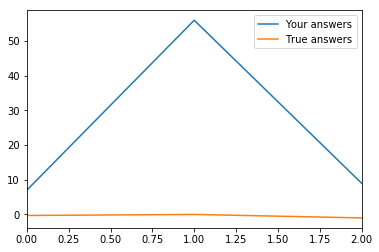

In [33]:
val.plot()
